___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

**Concrete Slump Test Regression**

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

**Importing dependencies**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import skew

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.model_selection import FeatureImportances

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'c',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# Environment settings: 
pd.set_option('display.float_format', lambda x: '%.6f' % x)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 60)

ModuleNotFoundError: No module named 'seaborn'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.model_selection import GridSearchCV

# Loading data

In [3]:
df_origin = pd.read_csv('./cement_slump.csv')
df = df_origin
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000000,82.000000,105.000000,210.000000,9.000000,904.000000,680.000000,23.000000,62.000000,34.990000
1,163.000000,149.000000,191.000000,180.000000,12.000000,843.000000,746.000000,0.000000,20.000000,41.140000
2,162.000000,148.000000,191.000000,179.000000,16.000000,840.000000,743.000000,1.000000,20.000000,41.810000
3,162.000000,148.000000,190.000000,179.000000,19.000000,838.000000,741.000000,3.000000,21.500000,42.080000
4,154.000000,112.000000,144.000000,220.000000,10.000000,923.000000,658.000000,20.000000,64.000000,26.820000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,103.000000,229.894175,78.877230,137.000000,152.000000,248.000000,303.900000,374.000000
Slag,103.000000,77.973786,60.461363,0.000000,0.050000,100.000000,125.000000,193.000000
Fly ash,103.000000,149.014563,85.418080,0.000000,115.500000,164.000000,235.950000,260.000000
Water,103.000000,197.167961,20.208158,160.000000,180.000000,196.000000,209.500000,240.000000
SP,103.000000,8.539806,2.807530,4.400000,6.000000,8.000000,10.000000,19.000000
Coarse Aggr.,103.000000,883.978641,88.391393,708.000000,819.500000,879.000000,952.800000,1049.900000
Fine Aggr.,103.000000,739.604854,63.342117,640.600000,684.500000,742.700000,788.000000,902.000000
SLUMP(cm),103.000000,18.048544,8.750844,0.000000,14.500000,21.500000,24.000000,29.000000
FLOW(cm),103.000000,49.610680,17.568610,20.000000,38.500000,54.000000,63.750000,78.000000
Compressive Strength (28-day)(Mpa),103.000000,36.038738,7.837120,17.190000,30.900000,35.520000,41.205000,58.530000


# EDA and Graphical analysis

## Multicolinarity Check Colorized Correlation

In [6]:
def check_multicolinarity(data):
    ''' data = list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if val >= 0.9 and val < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = pd.DataFrame(df.corr()).corr()
    df_corr = df_corr.applymap(lambda x: x if x>=0.9 and x<1 else np.NaN).dropna(how='all')
    df_corr = df_corr.dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

In [7]:
check_multicolinarity(df)

Multicolinarity Data (2, 2)


,SLUMP(cm),FLOW(cm)
SLUMP(cm),nan,0.982128
FLOW(cm),0.982128,nan


## Correlation between independent variable and dependent variable

In [8]:
corr = df.corr()['Compressive Strength (28-day)(Mpa)']
corr

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [9]:
abs(df.corr()['Compressive Strength (28-day)(Mpa)']).sort_values(ascending=False)

Compressive Strength (28-day)(Mpa)   1.000000
Cement                               0.445656
Fly ash                              0.444380
Slag                                 0.331522
Water                                0.254320
SLUMP(cm)                            0.223499
Coarse Aggr.                         0.160610
Fine Aggr.                           0.154532
FLOW(cm)                             0.124189
SP                                   0.037909
Name: Compressive Strength (28-day)(Mpa), dtype: float64

## Coefficient of determination (R^2)

In [10]:
R2_score = corr**2
R2_score.sort_values(ascending=False)

Compressive Strength (28-day)(Mpa)   1.000000
Cement                               0.198609
Fly ash                              0.197473
Slag                                 0.109907
Water                                0.064679
SLUMP(cm)                            0.049952
Coarse Aggr.                         0.025796
Fine Aggr.                           0.023880
FLOW(cm)                             0.015423
SP                                   0.001437
Name: Compressive Strength (28-day)(Mpa), dtype: float64

## Graphical analysis

### Heatmap

<AxesSubplot:>

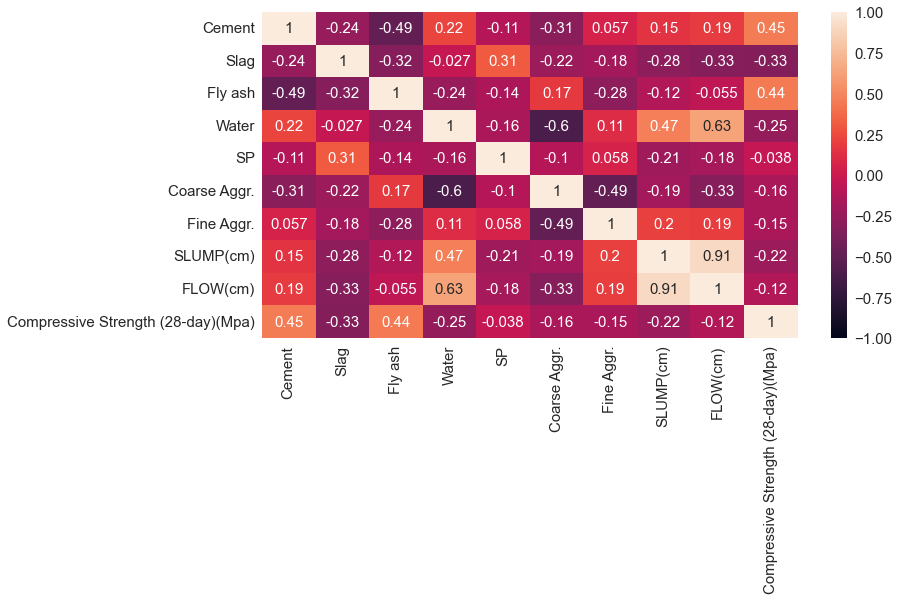

In [11]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1)

### Pairplot - Distribution of Features

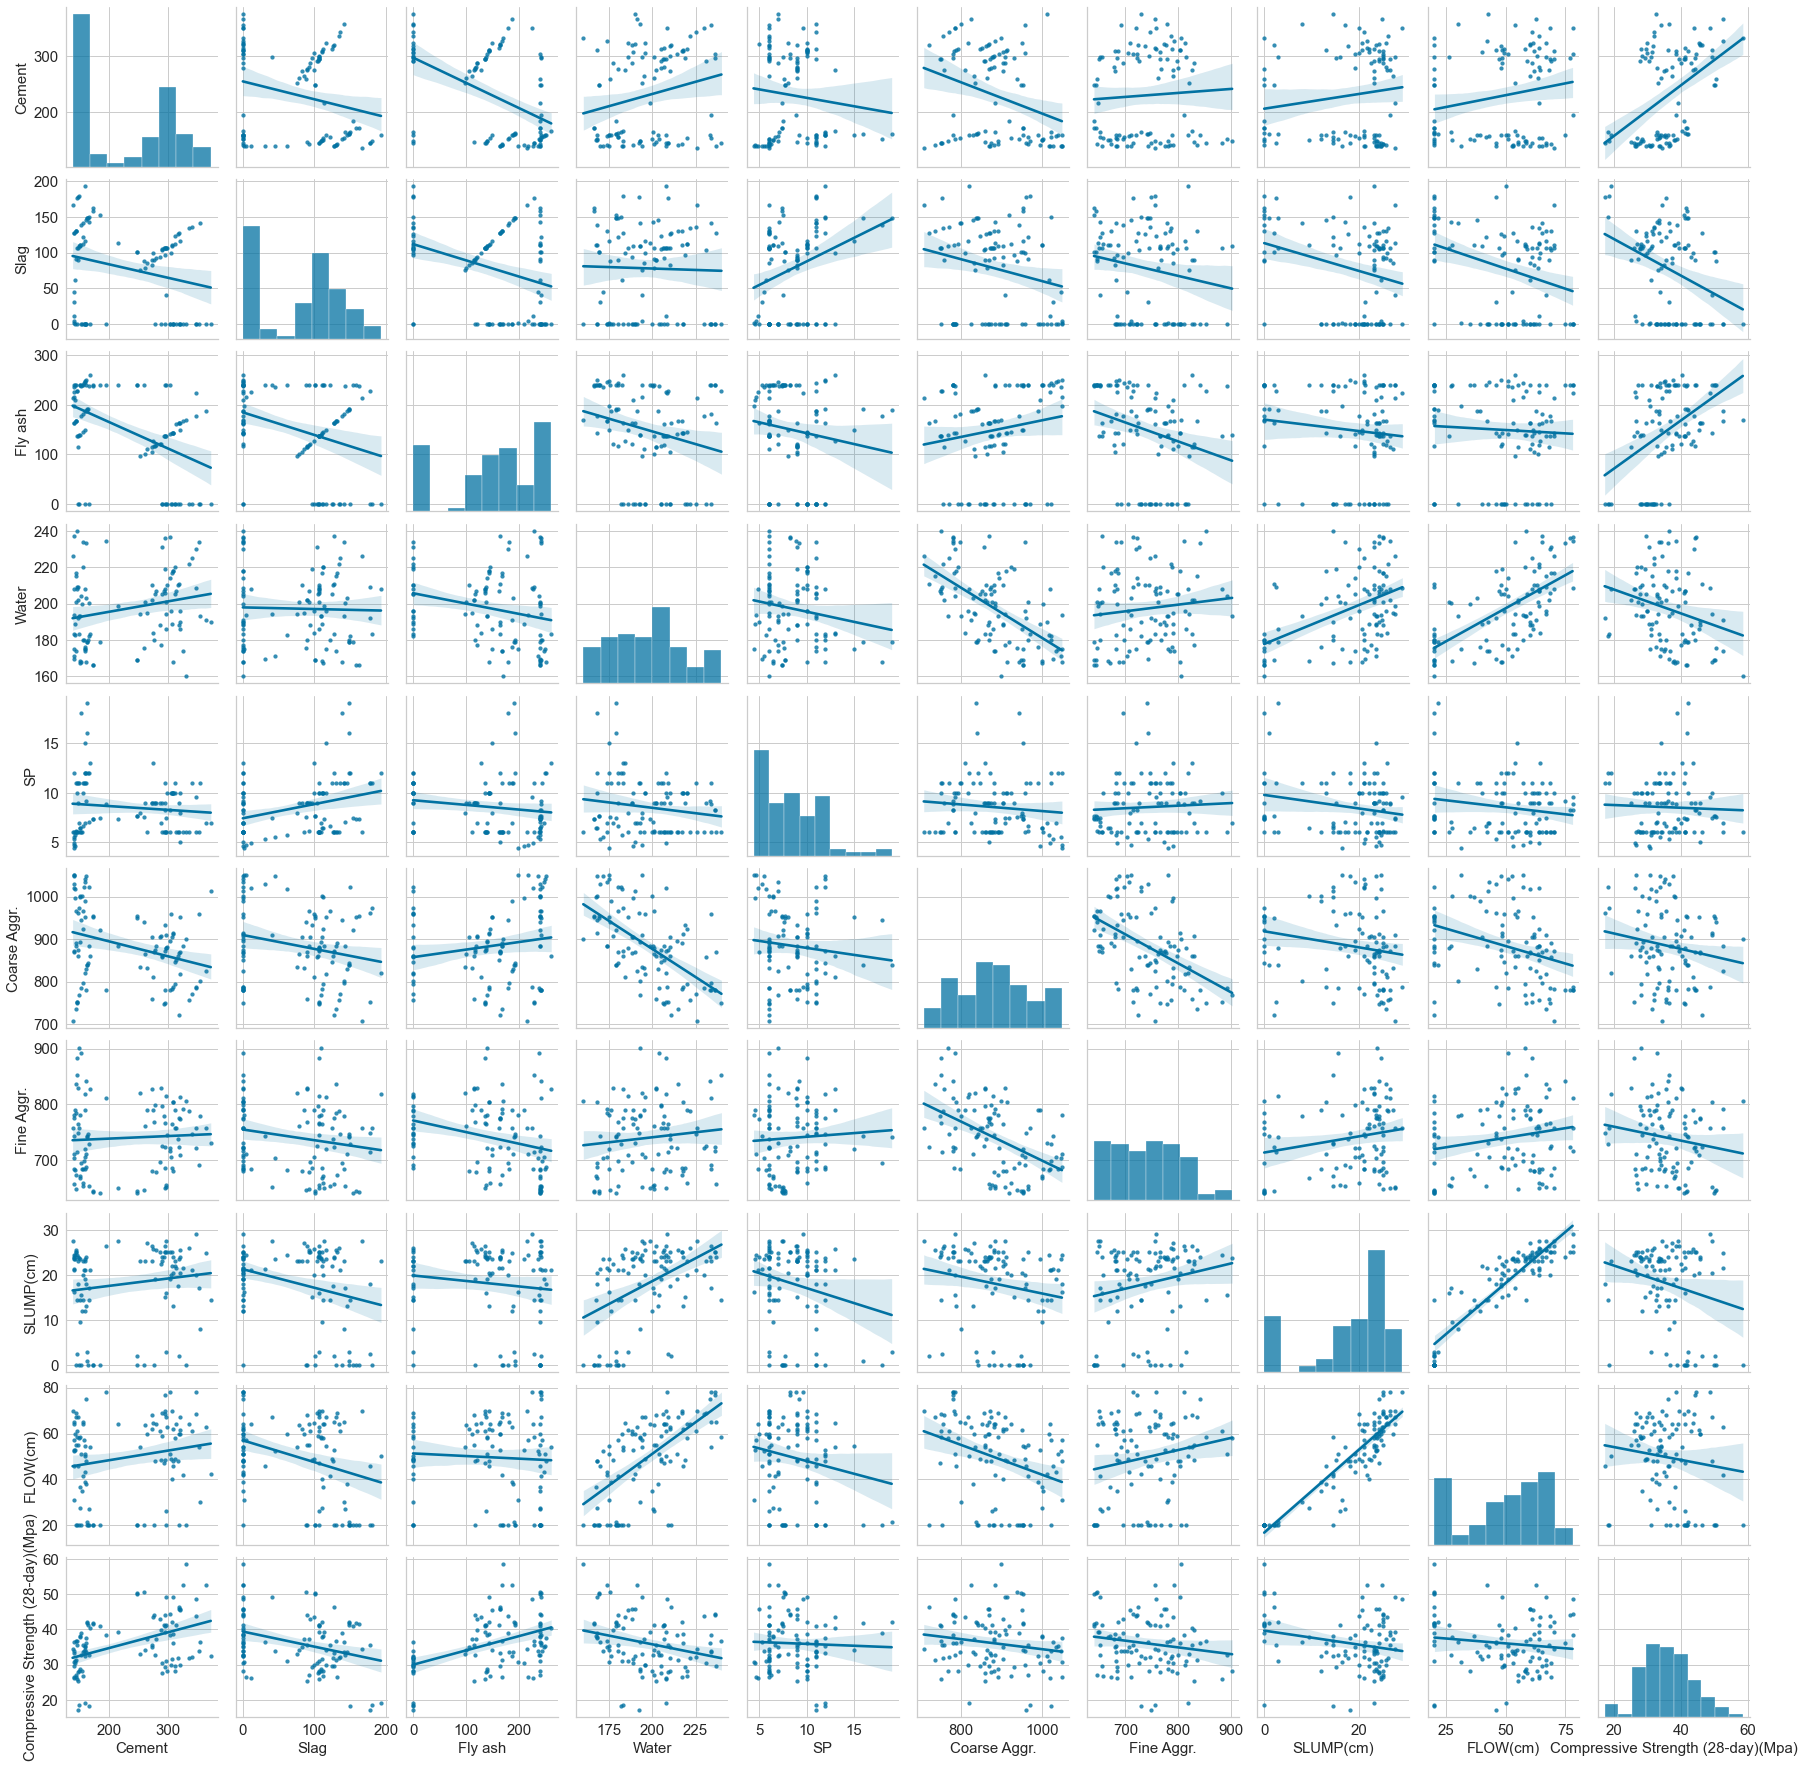

In [12]:
sns.pairplot(df, kind='reg', plot_kws={'scatter_kws':{'s':18}})

### Boxplot

<AxesSubplot:>

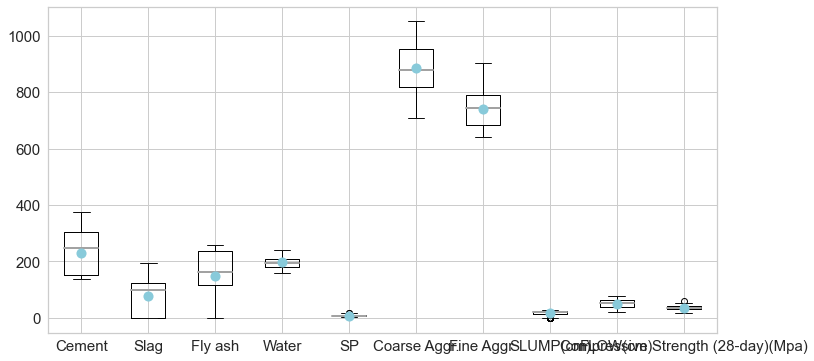

In [13]:
df.boxplot()

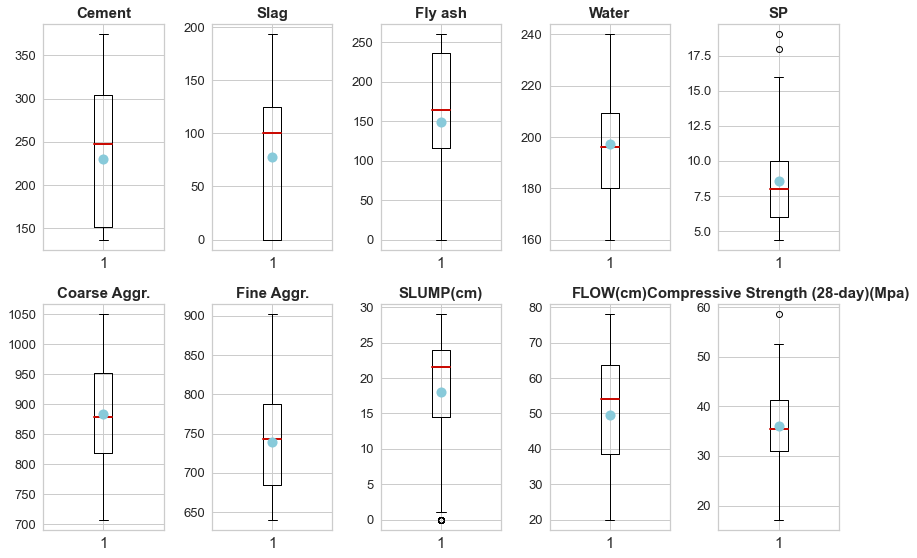

In [14]:
fig, axs = plt.subplots(int(np.ceil(len(df.columns)/5)), 5, figsize=(12,8))

for i, ax in enumerate(axs.flat):
    if i < len(df.columns):
        ax.boxplot(df.iloc[:,i])
        ax.set_title(df.columns[i], fontsize=15, fontweight='bold')
        ax.tick_params(axis='y', labelsize=13)

plt.tight_layout()

# Data Preprocessing 

## Features and Target variable
* Splitting the dataset into X(independent variables) and y (dependent variable)

In [15]:
X = df.drop(columns='Compressive Strength (28-day)(Mpa)')
y = df['Compressive Strength (28-day)(Mpa)']

## Splitting data into Train & Test
* Split the data into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## Scaling the Data
* import StandardScaler and scale the data. Use fit_transform() on the training set and transform() on the testing set to prevent data leakage.

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [19]:
# will be used in pipeline later
scaler = StandardScaler() 

In [20]:
# Use train - calc mean and sd
# if you don't use pipeline, you can use scaler directly
scaler.fit(X_train)

StandardScaler()

In [21]:
# Use scaler calc scaled data
X_train_scaled = scaler.transform(X_train) 
X_test_scaled  = scaler.transform(X_test)

In [22]:
# check X_train_scaled
pd.DataFrame(X_train_scaled, columns=X.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,82.000000,-0.000000,1.006154,-1.180229,-0.990318,0.020010,0.933483,1.820369
Slag,82.000000,0.000000,1.006154,-1.297210,-1.295158,0.360864,0.800008,1.871189
Fly ash,82.000000,0.000000,1.006154,-1.649362,-0.376828,0.208311,1.037447,1.191117
Water,82.000000,-0.000000,1.006154,-1.781644,-0.839996,-0.094016,0.566361,2.131697
SP,82.000000,0.000000,1.006154,-1.423970,-0.874324,-0.290324,0.499793,3.591555
Coarse Aggr.,82.000000,0.000000,1.006154,-2.054253,-0.707824,-0.084425,0.737949,1.838719
Fine Aggr.,82.000000,0.000000,1.006154,-1.582879,-0.880831,0.088205,0.721495,2.621368
SLUMP(cm),82.000000,-0.000000,1.006154,-1.960431,-0.348988,0.415058,0.706785,1.262455
FLOW(cm),82.000000,-0.000000,1.006154,-1.591123,-0.918211,0.189291,0.836969,1.661287


In [23]:
# check X_test_scaled
pd.DataFrame(X_test_scaled, columns=X.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,21.000000,-0.020203,0.992898,-1.135916,-0.964996,0.361850,0.870813,1.503850
Slag,21.000000,-0.084103,0.958420,-1.297210,-1.297210,0.163865,0.541447,1.608524
Fly ash,21.000000,0.214479,0.815606,-1.649362,-0.104142,0.248078,0.929793,1.304736
Water,21.000000,0.178986,0.925619,-1.390310,-0.656558,0.321777,0.664194,1.945813
SP,21.000000,-0.008957,0.802464,-1.355264,-0.874324,0.156264,0.499793,1.530380
Coarse Aggr.,21.000000,-0.247737,1.007321,-1.746823,-1.200281,-0.209674,0.393799,1.472080
Fine Aggr.,21.000000,0.046464,1.091523,-1.496028,-0.852685,-0.259201,0.807141,2.315780
SLUMP(cm),21.000000,0.222558,0.825903,-1.960431,-0.015586,0.595651,0.817919,0.984620
FLOW(cm),21.000000,0.340029,0.867921,-1.591123,-0.020994,0.651918,0.876222,1.605211


### Checking Scaled Data - std = 1 and mean = 0

this gives us the z-scores. so it's also called z-score scaling

These values show where in the normal distribution they correspond to the z score.

In [24]:
def check_scaled_data(train, test, columns=X.columns, agg=["mean", "std", min, max]):
    #Applying aggregation across all the columns, mean and std will be found for each column in the dataframe
    train = pd.DataFrame(train, columns=columns).agg(agg) 
    test = pd.DataFrame(test, columns=columns).agg(agg)
    return pd.concat([train, test], keys=["train", "test"]).T

In [25]:
check_scaled_data(X_train_scaled, X_test_scaled).head().round()

train                                  test                     \
             mean      std       min      max      mean      std       min   
Cement  -0.000000 1.000000 -1.000000 2.000000 -0.000000 1.000000 -1.000000   
Slag     0.000000 1.000000 -1.000000 2.000000 -0.000000 1.000000 -1.000000   
Fly ash  0.000000 1.000000 -2.000000 1.000000  0.000000 1.000000 -2.000000   
Water   -0.000000 1.000000 -2.000000 2.000000  0.000000 1.000000 -1.000000   
SP       0.000000 1.000000 -1.000000 4.000000 -0.000000 1.000000 -1.000000   

                  
             max  
Cement  2.000000  
Slag    2.000000  
Fly ash 1.000000  
Water   2.000000  
SP      2.000000

#  1. Model Building (Linear Regression)
* Build a linear regression model, fit the model, and make predictions on the test and train set, and compare them.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
# will be used in pipeline later
lin_model = LinearRegression() 

## Linear Model Fitting and Predicting - without Pipeline and without Scale

In [28]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = lin_model.predict(X_test)
y_train_pred = lin_model.predict(X_train)

In [30]:
def check_pred_data_describe(y_pred, y_train_pred):
    test = pd.DataFrame(y_pred, columns=['y_pred']).describe().T
    train = pd.DataFrame(y_train_pred, columns=['y_train_pred']).describe().T
    return pd.concat([test, train])

In [31]:
check_pred_data_describe(y_pred, y_train_pred)

,count,mean,std,min,25%,50%,75%,max
y_pred,21.000000,37.133398,6.736897,27.054030,30.864899,37.358593,42.560118,49.008115
y_train_pred,82.000000,35.847195,7.622170,17.256530,30.601279,35.967594,40.493695,52.198352


### Evaluation-Error Metric Check R^2 Score
* Evaluate the model if it is appropriate to linear regression,to do so use residuals and R-squared.

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# same train_val function
def get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, model_name="linear"):      
    train = pd.Series({
            "R2"   : r2_score(y_train, y_train_pred),
            "MAE"  : mean_absolute_error(y_train, y_train_pred),
            "MSE"  : mean_squared_error(y_train, y_train_pred),                          
            "RMSE" : np.sqrt(mean_squared_error(y_train, y_train_pred))}).to_frame(model_name+"_train")

    test = pd.DataFrame.from_dict({
            "R2"   : r2_score(y_test, y_pred),
            "MAE"  : mean_absolute_error(y_test, y_pred),
            "MSE"  : mean_squared_error(y_test, y_pred),
            "RMSE" : np.sqrt(mean_squared_error(y_test, y_pred))}, orient='index', columns=[model_name+"_test"])

    # merge (inner join by default)
    scores1 = pd.merge(train, test, left_index=True, right_index=True)
    # join (left join by default)
    scores2 = train.join(test)
    # concat (outer join by default)
    scores3 = pd.concat([train, test], axis=1)
    # append not recommended - use concat
    scores4 = train.append(test)
    
    # convert MultiIndex
    cols = scores1.columns.str.extract(r'(.+)_(.+)', expand=True)
    scores1.columns = pd.MultiIndex.from_arrays((cols[0], cols[0]+'_'+cols[1]))
    
    return scores1

In [33]:
get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "linear")

0          linear            
     linear_train linear_test
R2       0.907145    0.911967
MAE      1.936263    1.740383
MSE      5.874313    4.454237
RMSE     2.423698    2.110506

In [34]:
# Evaluate the result. Overfitting?
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.907145,0.911967
mae,1.936263,1.740383
mse,5.874313,4.454237
rmse,2.423698,2.110506


In [35]:
# check
2.423698/y.mean()

0.06725257718905493

### Linear Model Cross Validation - Data not Scaled X_train or Scaled X_train_scaled

In [36]:
# from sklearn.metrics import SCORERS
# list(SCORERS.keys())

In [37]:
from sklearn.model_selection import cross_validate, cross_val_score

In [38]:
model = LinearRegression()

In [39]:
# cross_validate with empty model - fit and predict 
# Check not Scaled X_train or Scaled X_train_scaled
scores = cross_validate(
    model, X_train_scaled, y_train, 
    scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error'], 
    cv = 5
)

In [40]:
df_scores_lm = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_lm

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.000000,0.000000,0.942208,-1.908524,-4.645188,-2.155270
1,0.000000,0.000000,0.706629,-2.647319,-10.756658,-3.279734
2,0.015631,0.000000,0.865934,-1.482831,-3.725762,-1.930223
3,0.000000,0.000000,0.923166,-2.244108,-8.434009,-2.904137
4,0.000000,0.000000,0.792889,-2.867905,-11.698265,-3.420273


In [41]:
df_scores_lm.iloc[:, 2:].mean()

test_r2                             0.846165
test_neg_mean_absolute_error       -2.230137
test_neg_mean_squared_error        -7.851977
test_neg_root_mean_squared_error   -2.737927
dtype: float64

In [42]:
# crosscheck before-after
ls

,linear_train,linear_test
R2,0.907145,0.911967
mae,1.936263,1.740383
mse,5.874313,4.454237
rmse,2.423698,2.110506


#### RMSE check Cross Validation 

In [43]:
 def check_cv_rmse_mean_div_target(train_rmse_mean, cv_rmse_mean, y=y, df=df):
    return pd.DataFrame.from_dict({
        "train RMSE percent(%)": train_rmse_mean/y.mean(),
        "CV RMSE percent(%)"   : cv_rmse_mean/y.mean()}
        , orient='index', columns=['RMSE/target(label)_percent(%)'])  

In [44]:
check_cv_rmse_mean_div_target(
    np.sqrt(mean_squared_error(y_train, y_train_pred)), 
    df_scores_lm['test_neg_root_mean_squared_error'].mean()) 

,RMSE/target(label)_percent(%)
train RMSE percent(%),0.067253
CV RMSE percent(%),-0.075972


### Coefficient - Slope Calculate 

In [45]:
def get_coeff_intercept(coeff_, intercept_, model_name='linear', X=X):
    coefficients = pd.DataFrame(coeff_, columns = [f'Coefficient_{model_name}'], index = X.columns)
    intercept    = pd.DataFrame({f'Coefficient_{model_name}': intercept_}, index=['intercept'])
    return pd.concat([coefficients, intercept])

In [46]:
# Calc Slope
lm_df = get_coeff_intercept(lin_model.coef_, lin_model.intercept_)
lm_df

,Coefficient_linear
Cement,0.054190
Slag,-0.036492
Fly ash,0.044675
Water,-0.233374
SP,0.041601
Coarse Aggr.,-0.060089
Fine Aggr.,-0.041999
SLUMP(cm),-0.243203
FLOW(cm),0.082191
intercept,149.990175


### **Result:________**

- next step Regularization

## Calc Residuals and Compare Actual and Predicted Labels 

### Calculate Manual Actual and Predicted Labels 

In [47]:
df_comparing = pd.DataFrame({"Actual": y_test, "Prediction": y_pred, "Residual":y_test-y_pred})
df_comparing.head()

,Actual,Prediction,Residual
30,45.820000,44.888792,0.931208
67,40.340000,41.416085,-1.076085
62,28.290000,28.566116,-0.276116
47,43.010000,39.400108,3.609892
42,33.510000,35.142947,-1.632947


In [48]:
lm_df

,Coefficient_linear
Cement,0.054190
Slag,-0.036492
Fly ash,0.044675
Water,-0.233374
SP,0.041601
Coarse Aggr.,-0.060089
Fine Aggr.,-0.041999
SLUMP(cm),-0.243203
FLOW(cm),0.082191
intercept,149.990175


In [49]:
# Sample Data
X_test.loc[30]

Cement         321.000000
Slag             0.000000
Fly ash        164.000000
Water          190.000000
SP               5.000000
Coarse Aggr.   870.000000
Fine Aggr.     774.000000
SLUMP(cm)       24.000000
FLOW(cm)        60.000000
Name: 30, dtype: float64

In [50]:
# y_pred = slope*X + intercept
# y_pred = b1*X + b0

In [51]:
lin_model.coef_*X_test.loc[30]

Cement          17.394970
Slag            -0.000000
Fly ash          7.326745
Water          -44.341051
SP               0.208006
Coarse Aggr.   -52.277209
Fine Aggr.     -32.507426
SLUMP(cm)       -5.836878
FLOW(cm)         4.931460
Name: 30, dtype: float64

In [52]:
# Calc Prediction vs Actual
sum(lin_model.coef_*X_test.loc[30]) + lin_model.intercept_, y_test.loc[30]

(44.88879166778861, 45.82)

In [53]:
df_comparing.sort_values(by='Residual', key=abs, ascending=False)

,Actual,Prediction,Residual
18,49.300000,44.674230,4.625770
47,43.010000,39.400108,3.609892
40,35.660000,39.031969,-3.371969
33,35.520000,38.764309,-3.244309
31,43.950000,46.743147,-2.793147
10,26.020000,28.772802,-2.752802
85,30.970000,32.895868,-1.925868
90,35.520000,37.358593,-1.838593
79,30.430000,28.744945,1.685055
42,33.510000,35.142947,-1.632947


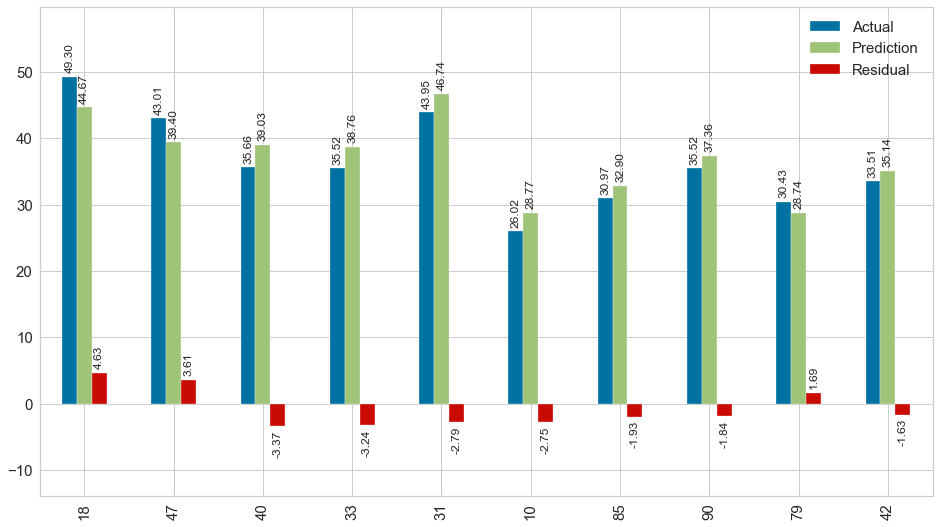

In [54]:
g = df_comparing.sort_values(by='Residual', key=abs, ascending=False).head(10).plot.bar(figsize=(16,9))

# annotate
for i in g.containers:
    g.bar_label(i, fmt='%.2f', fontsize=12, rotation=90, padding=4)

# pad the spacing between the number and the edge of the figure
g.margins(y=0.2) 

# tick_params(xaxis.set_tick_params) rotation or labelrotation
g.tick_params(axis='x', labelrotation=90)

### Check Residuals - Scatterplot

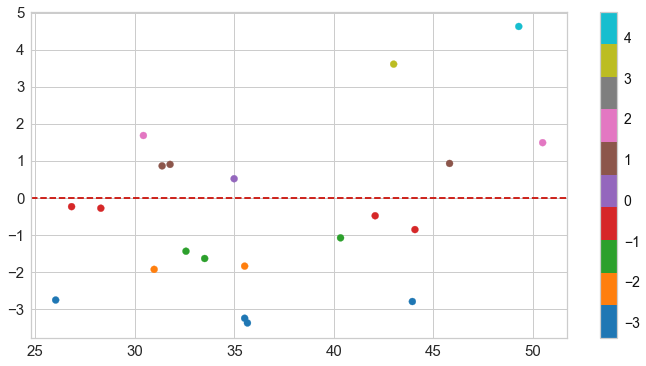

In [55]:
# Residuals scatterplot
plt.scatter(x=y_test, y='Residual', data=df_comparing, c=df_comparing['Residual'], cmap= 'tab10') 
plt.axhline(y = 0, color ="r", linestyle = "--")

# colorbar tick_params
plt.colorbar().ax.tick_params(axis='both', labelsize=14, colors='k')

### Check Residuals - Probplot

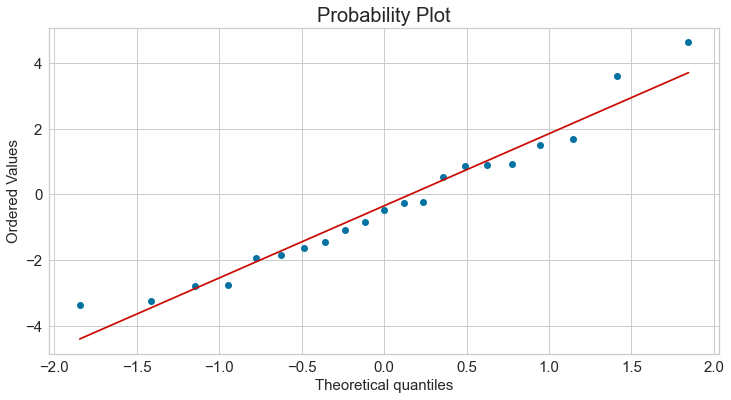

In [56]:
stats.probplot(df_comparing['Residual'], dist ="norm", plot =plt);

In [57]:
skew(df_comparing['Residual'])

0.6026499074920298

### Check Residuals - ResidualsPlot

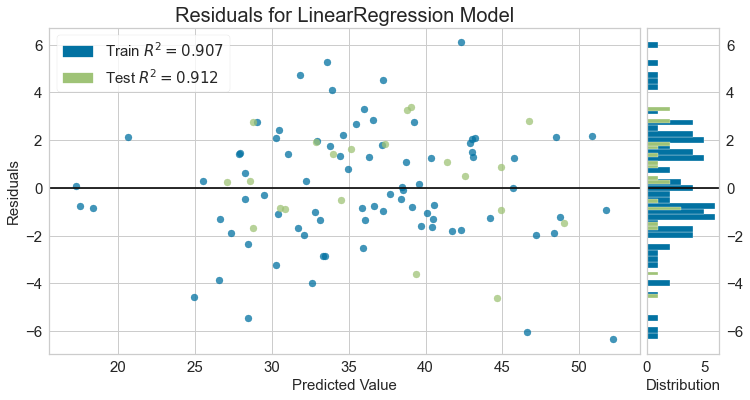

In [58]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

### Check Residuals - PredictionError

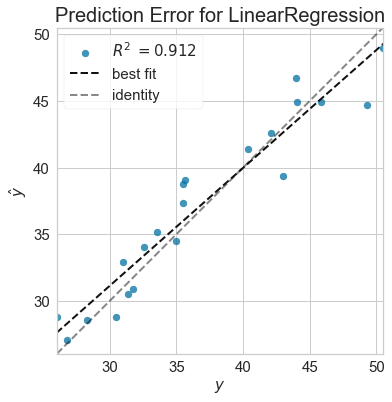

In [59]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

## Linear Model Model Fitting and Predicting - with Pipeline and with Scale

In [60]:
# pipeline is used to combine scaler and model
from sklearn.pipeline import Pipeline 

In [61]:
# will be used in pipeline
lm = LinearRegression() 
scaler = StandardScaler() 

In [62]:
# pipeline is used to combine scaler and model
pipe_lm = Pipeline(steps=[ 
    ("scaler", scaler) 
    ,("lm", lm) 
]) 

In [63]:
pipe_lm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

In [64]:
# predict on test data
y_pred = pipe_lm.predict(X_test) 
# predict on train data
y_train_pred = pipe_lm.predict(X_train) 

### Calculate Manual Actual and Predicted Labels 

In [65]:
# check coeff different after scalar process
get_coeff_intercept(pipe_lm.named_steps["lm"].coef_, pipe_lm.named_steps["lm"].intercept_)

,Coefficient_linear
Cement,4.280152
Slag,-2.222880
Fly ash,3.932020
Water,-4.770839
SP,0.121100
Coarse Aggr.,-5.277291
Fine Aggr.,-2.611313
SLUMP(cm),-2.188378
FLOW(cm),1.465706
intercept,35.847195


In [66]:
df_comparing.head(2)

,Actual,Prediction,Residual
30,45.820000,44.888792,0.931208
67,40.340000,41.416085,-1.076085


In [67]:
X_test_scaled[0]

array([ 1.14934917, -1.29720985,  0.21399196, -0.31414099, -1.21785265,
       -0.20967429,  0.56267018,  0.70678525,  0.65191812])

In [68]:
# Data = not scaled vs scaled 
X_test.loc[30], print(), pd.Series(X_test_scaled[0], index=X.columns)

(Cement         321.000000
 Slag             0.000000
 Fly ash        164.000000
 Water          190.000000
 SP               5.000000
 Coarse Aggr.   870.000000
 Fine Aggr.     774.000000
 SLUMP(cm)       24.000000
 FLOW(cm)        60.000000
 Name: 30, dtype: float64,
 None,
 Cement          1.149349
 Slag           -1.297210
 Fly ash         0.213992
 Water          -0.314141
 SP             -1.217853
 Coarse Aggr.   -0.209674
 Fine Aggr.      0.562670
 SLUMP(cm)       0.706785
 FLOW(cm)        0.651918
 dtype: float64)

In [69]:
# maual calc after scalar process predict
sum(pipe_lm.named_steps["lm"].coef_*X_test_scaled[0]) + pipe_lm.named_steps["lm"].intercept_

44.8887916677886

# 2. Regularization
* Regularize the model by adding a regularization term to the loss function.

## 2.1 Ridge (Apply and evaluate)
* Build a Ridge regression model, fit the model, and make predictions on the test and train set, and compare them.


In [70]:
from sklearn.linear_model import Ridge

In [71]:
# will be used in pipeline later
scaler = StandardScaler() 

In [72]:
# will be used in pipeline later
ridge_model = Ridge(alpha=1, random_state=42) 

In [73]:
# pipeline is used to combine scaler and model
pipe_ridge = Pipeline([
    ("scaler", scaler), 
    ("ridge", ridge_model)
])

In [74]:
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=1, random_state=42))])

In [75]:
y_pred = pipe_ridge.predict(X_test)
y_train_pred = pipe_ridge.predict(X_train)

In [76]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.906392,0.911204
mae,1.938096,1.732472
mse,5.921967,4.492822
rmse,2.433509,2.119628


In [77]:
pd.concat([ls, rs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.907145,0.911967,0.906392,0.911204
mae,1.936263,1.740383,1.938096,1.732472
mse,5.874313,4.454237,5.921967,4.492822
rmse,2.423698,2.110506,2.433509,2.119628


### Ridge Regression Check Cross Validation with alpha : 1

In [78]:
model = Pipeline([
    ("scaler", scaler), 
    ("ridge", ridge_model)
])

In [79]:
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    cv=5
)

In [80]:
df_scores_ridge = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_ridge

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.000000,0.000000,0.945011,-1.837154,-4.419908,-2.102358
1,0.015588,0.000000,0.708681,-2.651491,-10.681426,-3.268245
2,0.000000,0.000000,0.870580,-1.487804,-3.596664,-1.896487
3,0.000000,0.015624,0.920645,-2.255780,-8.710815,-2.951409
4,0.000000,0.000000,0.804676,-2.793295,-11.032516,-3.321523


In [81]:
df_scores_ridge.iloc[:, 2:].mean()

test_r2                             0.849918
test_neg_mean_absolute_error       -2.205105
test_neg_mean_squared_error        -7.688266
test_neg_root_mean_squared_error   -2.708004
dtype: float64

In [82]:
# crosscheck before-after
rs

,ridge_train,ridge_test
R2,0.906392,0.911204
mae,1.938096,1.732472
mse,5.921967,4.492822
rmse,2.433509,2.119628


In [83]:
rm_df = get_coeff_intercept(pipe_ridge["ridge"].coef_, pipe_ridge["ridge"].intercept_, model_name='ridge_coef_1')
rm_df

,Coefficient_ridge_coef_1
Cement,5.010922
Slag,-1.377652
Fly ash,4.806274
Water,-3.906449
SP,0.261385
Coarse Aggr.,-4.066443
Fine Aggr.,-1.746605
SLUMP(cm),-1.954987
FLOW(cm),1.133500
intercept,35.847195


In [84]:
pd.concat([lm_df, rm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_coef_1
Cement,0.054190,5.010922
Slag,-0.036492,-1.377652
Fly ash,0.044675,4.806274
Water,-0.233374,-3.906449
SP,0.041601,0.261385
Coarse Aggr.,-0.060089,-4.066443
Fine Aggr.,-0.041999,-1.746605
SLUMP(cm),-0.243203,-1.954987
FLOW(cm),0.082191,1.133500
intercept,149.990175,35.847195


###  Ridge Regression Choosing Alpha value

In [85]:
from sklearn.linear_model import RidgeCV

In [86]:
alpha_space = np.linspace(0.1, 1, 100)
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [87]:
# will be used in pipeline later
ridgecv_model = RidgeCV(
    alphas=alpha_space, 
    scoring= "neg_root_mean_squared_error",
    cv = 10
)

In [88]:
# pipeline is used to combine scaler and model
pipe_ridgecv = Pipeline([
    ("scaler", scaler), 
    ("ridgecv", ridgecv_model)
]) 

In [89]:
pipe_ridgecv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, scoring='neg_root_mean_squared_error'))])

In [90]:
pipe_ridgecv["ridgecv"].alpha_

0.9181818181818181

In [91]:
# Ridge( alpha = 0.91)
y_pred = pipe_ridgecv.predict(X_test)
y_train_pred = pipe_ridgecv.predict(X_train)

In [92]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv") 
rcs

,ridge_cv_train,ridge_cv_test
R2,0.906476,0.911355
mae,1.937773,1.732412
mse,5.916637,4.485191
rmse,2.432414,2.117827


In [93]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827


In [94]:
rcm_df = get_coeff_intercept(pipe_ridge["ridge"].coef_, pipe_ridge["ridge"].intercept_, model_name='ridge_cv')
rcm_df

,Coefficient_ridge_cv
Cement,5.010922
Slag,-1.377652
Fly ash,4.806274
Water,-3.906449
SP,0.261385
Coarse Aggr.,-4.066443
Fine Aggr.,-1.746605
SLUMP(cm),-1.954987
FLOW(cm),1.133500
intercept,35.847195


In [95]:
pd.concat([lm_df, rm_df, rcm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_coef_1,Coefficient_ridge_cv
Cement,0.054190,5.010922,5.010922
Slag,-0.036492,-1.377652,-1.377652
Fly ash,0.044675,4.806274,4.806274
Water,-0.233374,-3.906449,-3.906449
SP,0.041601,0.261385,0.261385
Coarse Aggr.,-0.060089,-4.066443,-4.066443
Fine Aggr.,-0.041999,-1.746605,-1.746605
SLUMP(cm),-0.243203,-1.954987,-1.954987
FLOW(cm),0.082191,1.133500,1.133500
intercept,149.990175,35.847195,35.847195


## 2.2 Lasso (Apply and evalute)
* Build a Lasso regression model, fit the model, and make predictions on the test and train set, and compare them.

In [96]:
from sklearn.linear_model import Lasso, LassoCV

In [97]:
lasso_model = Lasso(alpha=1, random_state=42)

In [98]:
# pipeline is used to combine scaler and model
pipe_lasso = Pipeline([
    ("scaler", scaler), 
    ("lasso", lasso_model)
]) 

In [99]:
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=1, random_state=42))])

In [100]:
y_pred = pipe_lasso.predict(X_test)
y_train_pred = pipe_lasso.predict(X_train)

In [101]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso") 
lss

,lasso_train,lasso_test
R2,0.776425,0.801642
mae,2.959616,2.466012
mse,14.144056,10.036383
rmse,3.760858,3.168025


In [102]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025


### Lasso Regression Cross Validation with Default Alpha : 1

In [103]:
pipe_lasso = Pipeline([
    ("scaler", scaler), 
    ("lasso", lasso_model)
])

In [104]:
scores = cross_validate(
    pipe_lasso, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    cv=5
)

In [105]:
df_scores_lasso = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_lasso

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.000000,0.000000,0.826285,-3.154233,-13.962787,-3.736681
1,0.000000,0.015625,0.499657,-3.387816,-18.345441,-4.283158
2,0.000000,0.000000,0.676319,-2.382057,-8.995287,-2.999214
3,0.000000,0.000000,0.681643,-4.372939,-34.945941,-5.911509
4,0.000000,0.000000,0.736091,-3.244457,-14.906371,-3.860877


In [106]:
df_scores_lasso.iloc[:, 2:].mean()

test_r2                              0.683999
test_neg_mean_absolute_error        -3.308301
test_neg_mean_squared_error        -18.231165
test_neg_root_mean_squared_error    -4.158288
dtype: float64

In [107]:
# crosscheck before-after
lss

,lasso_train,lasso_test
R2,0.776425,0.801642
mae,2.959616,2.466012
mse,14.144056,10.036383
rmse,3.760858,3.168025


In [108]:
lsm_df = get_coeff_intercept(pipe_lasso["lasso"].coef_, pipe_lasso["lasso"].intercept_, model_name='lasso_coef_1')
lsm_df

,Coefficient_lasso_coef_1
Cement,4.821314
Slag,-0.000000
Fly ash,4.880053
Water,-0.819769
SP,0.000000
Coarse Aggr.,-0.351495
Fine Aggr.,-0.000000
SLUMP(cm),-0.710631
FLOW(cm),-0.000000
intercept,35.847195


In [109]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_coef_1,Coefficient_ridge_cv,Coefficient_lasso_coef_1
Cement,0.054190,5.010922,5.010922,4.821314
Slag,-0.036492,-1.377652,-1.377652,-0.000000
Fly ash,0.044675,4.806274,4.806274,4.880053
Water,-0.233374,-3.906449,-3.906449,-0.819769
SP,0.041601,0.261385,0.261385,0.000000
Coarse Aggr.,-0.060089,-4.066443,-4.066443,-0.351495
Fine Aggr.,-0.041999,-1.746605,-1.746605,-0.000000
SLUMP(cm),-0.243203,-1.954987,-1.954987,-0.710631
FLOW(cm),0.082191,1.133500,1.133500,-0.000000
intercept,149.990175,35.847195,35.847195,35.847195


### Lasso Regression choosing  best Alpha value

In [110]:
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [111]:
# will be used in pipeline later
lassocv_model = LassoCV(
    alphas=alpha_space, 
    max_iter=100000, 
    cv=10, 
    random_state=42
) 

In [112]:
pipe_lassocv = Pipeline([
    ("scaler", scaler), 
    ("lassocv", lassocv_model)
]) 

In [113]:
pipe_lassocv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lassocv',
                 LassoCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, max_iter=100000, random_state=42))])

In [114]:
pipe_lassocv["lassocv"].alpha_

0.1

In [115]:
# Lasso(alpha =0.1)
y_pred = pipe_lassocv.predict(X_test)   
y_train_pred = pipe_lassocv.predict(X_train)

In [116]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.900491,0.907944
mae,1.966753,1.766723
mse,6.295287,4.657759
rmse,2.509041,2.158184


In [117]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184


In [118]:
lcm_df = get_coeff_intercept(pipe_lassocv["lassocv"].coef_, pipe_lassocv["lassocv"].intercept_, model_name='lasso_cv_coef_0.1')
lcm_df

,Coefficient_lasso_cv_coef_0.1
Cement,6.360581
Slag,0.000000
Fly ash,6.448608
Water,-2.385571
SP,0.467338
Coarse Aggr.,-2.090038
Fine Aggr.,-0.228233
SLUMP(cm),-1.081774
FLOW(cm),0.000000
intercept,35.847195


In [119]:
# (7 fearures ile) test_r2 = 0.90
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_coef_1,Coefficient_ridge_cv,Coefficient_lasso_coef_1,Coefficient_lasso_cv_coef_0.1
Cement,0.054190,5.010922,5.010922,4.821314,6.360581
Slag,-0.036492,-1.377652,-1.377652,-0.000000,0.000000
Fly ash,0.044675,4.806274,4.806274,4.880053,6.448608
Water,-0.233374,-3.906449,-3.906449,-0.819769,-2.385571
SP,0.041601,0.261385,0.261385,0.000000,0.467338
Coarse Aggr.,-0.060089,-4.066443,-4.066443,-0.351495,-2.090038
Fine Aggr.,-0.041999,-1.746605,-1.746605,-0.000000,-0.228233
SLUMP(cm),-0.243203,-1.954987,-1.954987,-0.710631,-1.081774
FLOW(cm),0.082191,1.133500,1.133500,-0.000000,0.000000
intercept,149.990175,35.847195,35.847195,35.847195,35.847195


## 2.3 Elastic-Net (Apply and evaluate )

---

* Build an Elastic-Net regression model, fit the model, and make predictions on the test and train set, and compare them.
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [120]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [121]:
# l1_ratio is used to control the amount of L1 and L2 regularization
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) 

In [122]:
# pipeline is used to combine scaler and model
pipe_elastic = Pipeline([
    ("scaler", scaler), 
    ("elastic", elastic_model)
]) 

In [123]:
pipe_elastic.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('elastic', ElasticNet(alpha=1, random_state=42))])

In [124]:
y_pred = pipe_elastic.predict(X_test)
y_train_pred = pipe_elastic.predict(X_train)

In [125]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.636729,0.635031
mae,3.802838,3.555946
mse,22.981720,18.466419
rmse,4.793925,4.297257


In [126]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944,0.636729,0.635031
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723,3.802838,3.555946
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759,22.981720,18.466419
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184,4.793925,4.297257


### Elastic_net Regression Check Cross Validation with Default Alpha : 1 and l1_ratio=0.5

In [127]:
model = Pipeline([
    ("scaler", scaler), 
    ("elastic", ElasticNet(alpha=1, l1_ratio=0.5, random_state=42))
])

In [128]:
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error']
    , cv=5
)

In [129]:
df_scores_elastic = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_elastic

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.004998,0.002002,0.559420,-4.933674,-35.412716,-5.950858
1,0.003000,0.002033,0.466474,-3.311646,-19.562145,-4.422911
2,0.003004,0.002998,0.537252,-3.036801,-12.860032,-3.586089
3,0.004000,0.001969,0.540848,-5.517945,-50.401042,-7.099369
4,0.005054,0.001984,0.625048,-4.116153,-21.178438,-4.602004


In [130]:
df_scores_elastic.iloc[:, 2:].mean()

test_r2                              0.545808
test_neg_mean_absolute_error        -4.183244
test_neg_mean_squared_error        -27.882875
test_neg_root_mean_squared_error    -5.132246
dtype: float64

In [131]:
# crosscheck before-after
es

,elastic_train,elastic_test
R2,0.636729,0.635031
mae,3.802838,3.555946
mse,22.981720,18.466419
rmse,4.793925,4.297257


In [132]:
em_df = get_coeff_intercept(pipe_elastic["elastic"].coef_, pipe_elastic["elastic"].intercept_, model_name='elastic_coef_(alp:1, L1:0.5)')
em_df

,"Coefficient_elastic_coef_(alp:1, L1:0.5)"
Cement,2.616571
Slag,-0.730153
Fly ash,2.671399
Water,-1.201959
SP,0.000000
Coarse Aggr.,-1.163868
Fine Aggr.,-0.322340
SLUMP(cm),-0.825696
FLOW(cm),-0.000000
intercept,35.847195


In [133]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,Coefficient_linear,Coefficient_ridge_coef_1,Coefficient_ridge_cv,Coefficient_lasso_coef_1,Coefficient_lasso_cv_coef_0.1,"Coefficient_elastic_coef_(alp:1, L1:0.5)"
Cement,0.054190,5.010922,5.010922,4.821314,6.360581,2.616571
Slag,-0.036492,-1.377652,-1.377652,-0.000000,0.000000,-0.730153
Fly ash,0.044675,4.806274,4.806274,4.880053,6.448608,2.671399
Water,-0.233374,-3.906449,-3.906449,-0.819769,-2.385571,-1.201959
SP,0.041601,0.261385,0.261385,0.000000,0.467338,0.000000
Coarse Aggr.,-0.060089,-4.066443,-4.066443,-0.351495,-2.090038,-1.163868
Fine Aggr.,-0.041999,-1.746605,-1.746605,-0.000000,-0.228233,-0.322340
SLUMP(cm),-0.243203,-1.954987,-1.954987,-0.710631,-1.081774,-0.825696
FLOW(cm),0.082191,1.133500,1.133500,-0.000000,0.000000,-0.000000
intercept,149.990175,35.847195,35.847195,35.847195,35.847195,35.847195


### **Grid Search for ElasticNet for choosing best elastic__alpha - elastic__l1_ratio**

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
elastic_model = ElasticNet(max_iter=10000, random_state=42) 

In [136]:
# pipeline is used to combine scaler and model
pipe_elastic = Pipeline([
    ("scaler", scaler), 
    ("elastic", elastic_model)
]) 

In [137]:
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [138]:
ratio_space = np.concatenate((np.linspace(0.1, 0.2, 3), np.arange(0.3, 0.8, 0.2), np.linspace(0.9, 1, 3)))
ratio_space

array([0.1 , 0.15, 0.2 , 0.3 , 0.5 , 0.7 , 0.9 , 0.95, 1.  ])

In [139]:
param_grid = {"elastic__alpha":alpha_space,
            "elastic__l1_ratio":ratio_space}

In [140]:
grid_model = GridSearchCV(
    estimator = pipe_elastic, 
    param_grid = param_grid, 
    scoring = 'neg_root_mean_squared_error',
    cv =10, verbose =2
)

In [141]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 900 candidates, totalling 9000 fits
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.1, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.1, elastic__

[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l

[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l

[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l

[CV] END elastic__alpha=0.13636363636363635, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.13636363636363635, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.13636363636363635, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.13636363636363635, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.13636363636363635, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.13636363636363635, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545

[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454

[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364

[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182

[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elast

[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__

[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, 

[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.22727272

[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636

[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.24545454

[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.2; total time=   0.0s
[C

[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l

[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, 

[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END ..........elastic__

[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l

[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727,

[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636

[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3454545454

[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.3

[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l

[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183

[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elas

[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.15000000000000002

[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l

[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.427272727

[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.44545454545454544, elastic__l1_ratio=0.15000000

[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l

[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l

[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266

[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.49090909090909085, elastic_

[CV] END elastic__alpha=0.49090909090909085, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic

[CV] END elastic__alpha=0.509090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.509090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.509090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.509090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.509090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.509090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.509090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.509090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.509090909090909, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.509090909090909, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alph

[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l

[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l

[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l

[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, el

[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l

[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.5727272727272728, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5727272727272728, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5727272727272728, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5727272727272728, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5727272727272728, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5727272727272728, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5727272727272728, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5727272727272728, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5727272727272728, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5727272727272728, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5727272727272728, elastic__l

[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, 

[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l

[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__

[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_

[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.150000000000

[CV] END elastic__alpha=0.6363636363636364, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.6363636363636364, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.6363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6363636363636364, elastic__l

[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, e

[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, 

[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l

[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l

[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elas

[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic_

[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l

[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l

[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alph

[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l

[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l

[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l

[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l

[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elasti

[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.15000000000000002; total tim

[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.2; total tim

[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l

[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l

[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l

[CV] END elastic__alpha=0.8636363636363635, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8636363636363635, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8636363636363635, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8636363636363635, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8636363636363635, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.8636363636363635, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.8636363636363635, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.8636363636363635, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.8636363636363635, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.8636363636363635, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.8636363636363635, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.8636363636363635, elasti

[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l

[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.89

[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l

[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9090909090909091, elastic__l

[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elast

[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.150000000000

[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, 

[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l

[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elast

[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=1.0; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__

[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.15000000000000002; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.15000000000000002;

[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.2; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.3; total time=   0.0s
[CV] END ..........elastic__

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elastic',
                                        ElasticNet(max_iter=10000,
                                                   random_state=42))]),
             param_grid={'elastic__alpha': array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545,...
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         'elastic__l1_ratio': array([0.1 , 0.15, 0.2 , 0.3 , 0.5 , 0.7 , 0.9 ,

In [142]:
grid_model.best_params_

{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1.0}

In [143]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

In [144]:
gm = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_grid")
gm

,elastic_grid_train,elastic_grid_test
R2,0.900491,0.907944
mae,1.966753,1.766723
mse,6.295287,4.657759
rmse,2.509041,2.158184


In [145]:
pd.concat([ls,rs, rcs, lss, lcs, es, gm], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_grid_train,elastic_grid_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944,0.636729,0.635031,0.900491,0.907944
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723,3.802838,3.555946,1.966753,1.766723
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759,22.981720,18.466419,6.295287,4.657759
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184,4.793925,4.297257,2.509041,2.158184


# Feature importances

## Feature importances with Ridge

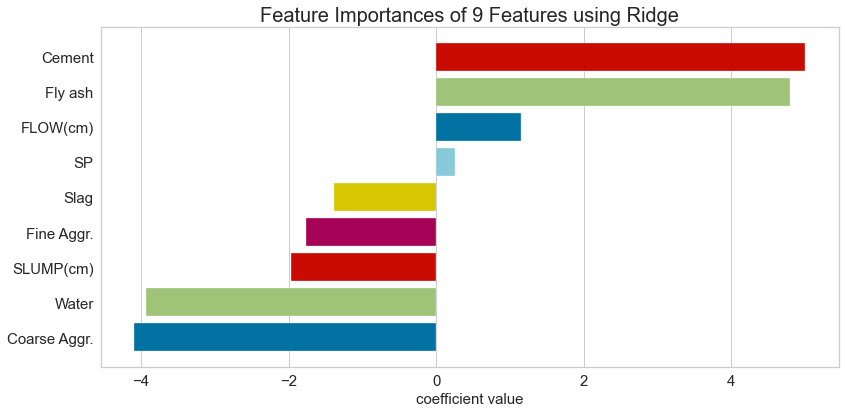

<AxesSubplot:title={'center':'Feature Importances of 9 Features using Ridge'}, xlabel='coefficient value'>

In [146]:
from yellowbrick.model_selection import FeatureImportances 

model = Ridge(alpha=pipe_ridgecv["ridgecv"].alpha_)  # ridge_cv_model.alpha_ = 0.91
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()

## Feature importances with Lasso

In [147]:
pipe_lassocv["lassocv"].alpha_

0.1

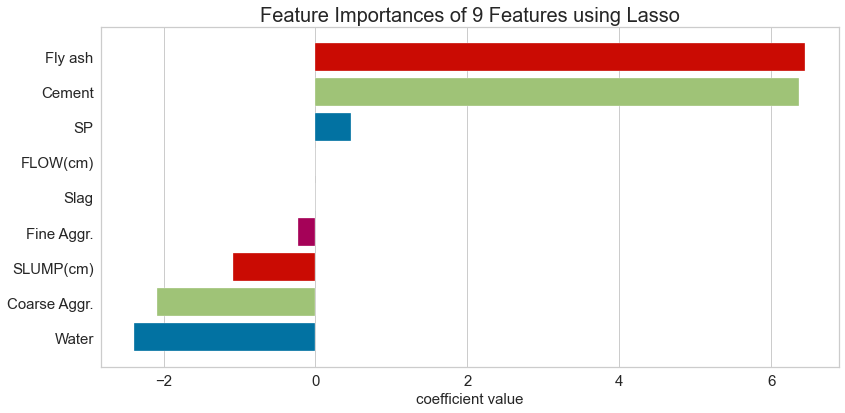

<AxesSubplot:title={'center':'Feature Importances of 9 Features using Lasso'}, xlabel='coefficient value'>

In [148]:
from yellowbrick.model_selection import FeatureImportances

model = Lasso(alpha=pipe_lassocv["lassocv"].alpha_)  # lasso_cv_model.alpha_ = 0.1
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___